In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.style.use('fivethirtyeight')

In [9]:
data = pd.read_csv("MSFT.csv")
data.head

<bound method NDFrame.head of            Date        Open        High         Low       Close   Adj Close  \
0    2022-08-24  275.410004  277.230011  275.109985  275.790009  273.151123   
1    2022-08-25  277.329987  279.019989  274.519989  278.850006  276.181854   
2    2022-08-26  279.079987  280.339996  267.980011  268.089996  265.524811   
3    2022-08-29  265.850006  267.399994  263.850006  265.230011  262.692200   
4    2022-08-30  266.670013  267.049988  260.660004  262.970001  260.453827   
..          ...         ...         ...         ...         ...         ...   
247  2023-08-18  314.489990  318.380005  311.549988  316.480011  316.480011   
248  2023-08-21  317.929993  322.769989  317.040009  321.880005  321.880005   
249  2023-08-22  325.500000  326.079987  321.459991  322.459991  322.459991   
250  2023-08-23  323.820007  329.200012  323.459991  327.000000  327.000000   
251  2023-08-24  332.850006  332.980011  320.933105  321.390015  321.390015   

       Volume  
0    

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       252 non-null    float64
 2   High       252 non-null    float64
 3   Low        252 non-null    float64
 4   Close      252 non-null    float64
 5   Adj Close  252 non-null    float64
 6   Volume     252 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [11]:
data["Close"]

0      275.790009
1      278.850006
2      268.089996
3      265.230011
4      262.970001
          ...    
247    316.480011
248    321.880005
249    322.459991
250    327.000000
251    321.390015
Name: Close, Length: 252, dtype: float64

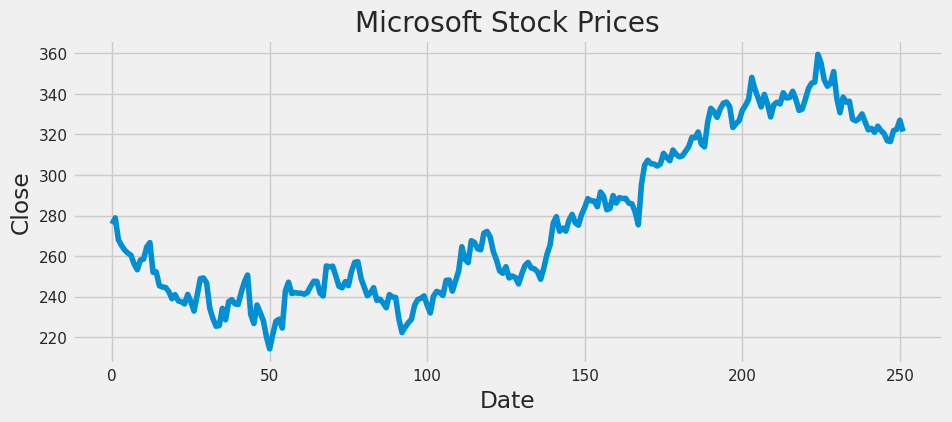

In [12]:
plt.figure(figsize=(10, 4))
plt.title("Microsoft Stock Prices")
plt.xlabel("Date")
plt.ylabel("Close")
plt.plot(data["Close"])
plt.show()

<ipython-input-13-447603b6d7a4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(data.corr())
<ipython-input-13-447603b6d7a4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


               Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.997521  0.998064  0.994390   0.994398 -0.095920
High       0.997521  1.000000  0.997660  0.997800   0.997743 -0.071157
Low        0.998064  0.997660  1.000000  0.997674   0.997696 -0.110310
Close      0.994390  0.997800  0.997674  1.000000   0.999951 -0.088772
Adj Close  0.994398  0.997743  0.997696  0.999951   1.000000 -0.089110
Volume    -0.095920 -0.071157 -0.110310 -0.088772  -0.089110  1.000000


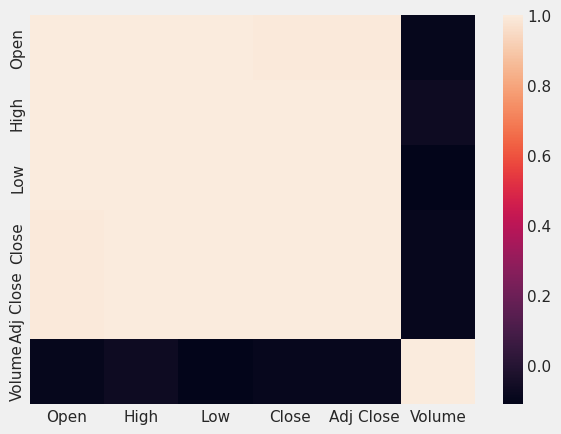

In [13]:
print(data.corr())
sns.heatmap(data.corr())
plt.show()

In [15]:
X = data[["Open" , "High" , "Low"]]
y = data["Close"]

In [19]:
X = X.to_numpy()
y = y.to_numpy()

In [23]:
X.shape

(252, 3)

In [24]:
y.shape

(252,)

In [25]:
y = y.reshape(-1, 1)

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X.shape , x_train.shape , x_test.shape)

(252, 3) (201, 3) (51, 3)


In [28]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(x_train, y_train)

DecisionTreeRegressor()

In [31]:
y_pred = model.predict(x_test)
data1= pd.DataFrame(data={"Predicted Rate": y_pred})
print(data1.head())

   Predicted Rate
0      283.489990
1      258.059998
2      258.059998
3      307.260010
4      269.320007


In [32]:
y_pred

array([283.48999 , 258.059998, 258.059998, 307.26001 , 269.320007,
       308.970001, 327.      , 327.779999, 257.220001, 247.490005,
       242.979996, 328.600006, 350.980011, 288.299988, 249.199997,
       272.290009, 331.209991, 245.119995, 232.130005, 236.149994,
       237.529999, 247.25    , 262.149994, 253.699997, 228.850006,
       320.399994, 321.880005, 327.779999, 256.769989, 288.799988,
       261.470001, 228.559998, 254.690002, 242.119995, 348.100006,
       236.479996, 247.110001, 241.729996, 337.98999 , 309.459991,
       242.119995, 260.790009, 288.799988, 272.290009, 229.100006,
       309.459991, 242.710007, 245.029999, 272.290009, 307.      ,
       241.550003])

In [33]:
y_test

array([[285.76001 ],
       [260.399994],
       [264.600006],
       [305.410004],
       [266.730011],
       [314.      ],
       [326.790009],
       [327.5     ],
       [258.089996],
       [246.789993],
       [241.679993],
       [331.829987],
       [346.869995],
       [289.839996],
       [255.139999],
       [275.230011],
       [333.679993],
       [245.380005],
       [231.929993],
       [241.070007],
       [236.960007],
       [238.949997],
       [263.100006],
       [251.509995],
       [225.410004],
       [321.01001 ],
       [321.179993],
       [332.470001],
       [258.519989],
       [288.369995],
       [276.200012],
       [235.770004],
       [254.770004],
       [241.800003],
       [340.540009],
       [237.5     ],
       [247.809998],
       [242.449997],
       [338.049988],
       [311.73999 ],
       [240.330002],
       [256.869995],
       [289.390015],
       [273.779999],
       [226.75    ],
       [312.309998],
       [244.740005],
       [241.7